In [1]:
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import plotly as plt
import plotly.express as px

ModuleNotFoundError: No module named 'sklearn'

# Read the CSV and Perform Basic Data Cleaning

In [5]:
bees = pd.read_csv("../bee_data/machine_learning_dataset.csv")
# Drop the null columns where all values are null
bees.head()

,year,state,deadout,cc_syn,pesticides,lbs_of_honey,count_colonies,extreme_temp_days
0,2019,ALABAMA,2300,430,5.4,44000,6166,16
1,2019,ARIZONA,11500,5670,50.9,201000,27333,24
2,2019,ARKANSAS,10200,1870,113.6,176000,22333,51
3,2019,CALIFORNIA,464000,44500,39.6,3216000,830000,0
4,2019,COLORADO,17820,4600,25.5,500000,21666,136


In [6]:
bees.columns

Index(['year', 'state', 'deadout', 'cc_syn', 'pesticides', 'lbs_of_honey',
       'count_colonies', 'extreme_temp_days'],
      dtype='object')

# Feature Selection

In [7]:
# This will also be used as your x values.
selected_features = bees[['deadout', 'cc_syn', 'pesticides',
       'lbs_of_honey', 'count_colonies', 'extreme_temp_days']]

In [8]:
X = selected_features[['deadout', 'cc_syn', 'pesticides', 'count_colonies', 'extreme_temp_days']]
y = selected_features["lbs_of_honey"]
X.head()

,deadout,cc_syn,pesticides,count_colonies,extreme_temp_days
0,2300,430,5.4,6166,16
1,11500,5670,50.9,27333,24
2,10200,1870,113.6,22333,51
3,464000,44500,39.6,830000,0
4,17820,4600,25.5,21666,136


# Create a Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [10]:
X_train.head()

,deadout,cc_syn,pesticides,count_colonies,extreme_temp_days
0,2300,430,5.4,6166,16
26,7800,2700,3.5,16333,115
2,10200,1870,113.6,22333,51
34,570,50,0.8,6833,149
38,18700,4520,33.3,41833,158


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [11]:
# Scale your data to fit data around 0
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Train the Model



In [12]:
hive = LinearRegression()

In [13]:
hive.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

## metrics are calculated on what's being predicted on data prior to scaling
predicted = hive.predict(X)

## score the prediction
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f'Mean Squared Error MSE: {mse}')
print(f'R2 Value: {r2}')

Mean Squared Error MSE: 1143912025866.7712
R2 Value: 0.6310640375590354


In [15]:
hive.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

## metrics are calculated on what's being predicted for the training data
predicted = hive.predict(X_train_scaled)

## score the prediction
mse = mean_squared_error(y_train, predicted)
r2 = r2_score(y_train, predicted)

print(f'Mean Squared Error MSE: {mse}')
print(f'R2 Value: {r2}')

## Great score on training data...

Mean Squared Error MSE: 345844087043.69885
R2 Value: 0.8883450656919722


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

## metrics are calculated on what's being predicted for the testing data
predicted = hive.predict(X_test_scaled)

## score the prediction
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f'Mean Squared Error MSE: {mse}')
print(f'R2 Value: {r2}')

## Not enough testing data to qualify as a proper model prediction

Mean Squared Error MSE: 255733050286128.16
R2 Value: -83.61726256276751


# EDA

<!-- 'deadout', 'cc_syn', 'pesticides', 'count_colonies', 'extreme_temp_days' -->

In [18]:

# df = px.data.tips()
fig = px.scatter(bees, x="cc_syn", y="lbs_of_honey", trendline="ols")
fig.show()

results = px.get_trendline_results(fig)
print(results)


NameError: name 'px' is not defined

In [19]:
import plotly.express as px

# df = px.data.tips()
fig = px.scatter(
    bees, x='deadout', y='lbs_of_honey', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [20]:
import plotly.express as px

# df = px.data.tips()
fig = px.scatter(
    bees, x='pesticides', y='lbs_of_honey', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [21]:
import plotly.express as px

# df = px.data.tips()
fig = px.scatter(
    bees, x='count_colonies', y='lbs_of_honey', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [22]:
import plotly.express as px

# df = px.data.tips()
fig = px.scatter(
    bees, x='extreme_temp_days', y='lbs_of_honey', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

ModuleNotFoundError: No module named 'plotly'

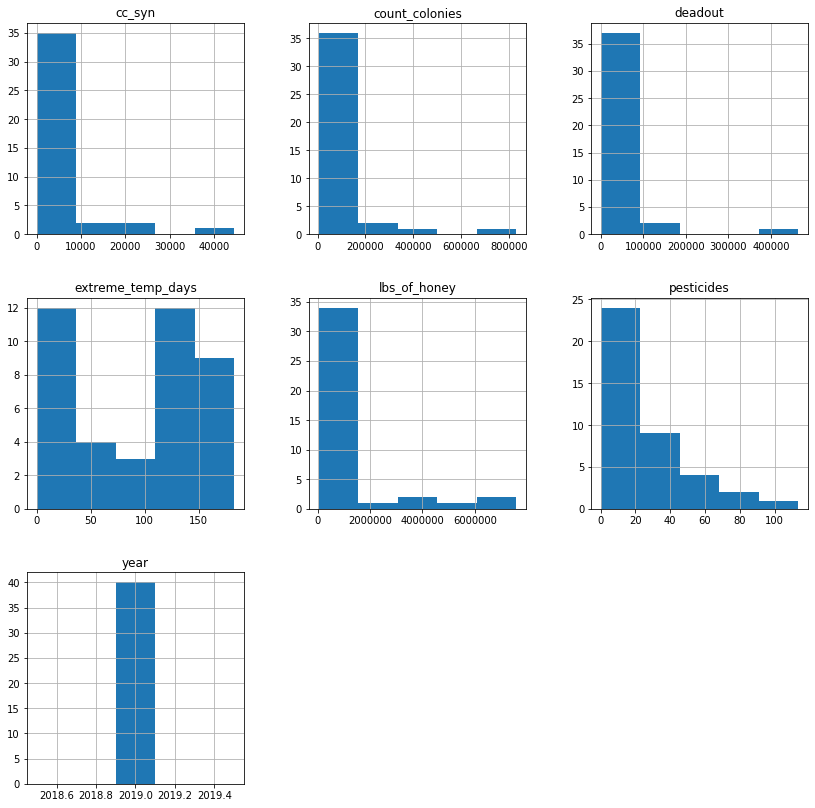

In [23]:
hist = bees.hist(bins=5,figsize=(14, 14))


# Save the Model

In [25]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'final_model.sav'
joblib.dump({'model':hive, 'scaler':X_scaler}, filename)

['final_model.sav']